# Regression Task using Keras

In this project we use Keras library for a regression task.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_home = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis (EDA)

In [4]:
# We use .describ() to get some statistical information about dataset

df_home.describe()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
# First we check if we have null value in the data set

df_home.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

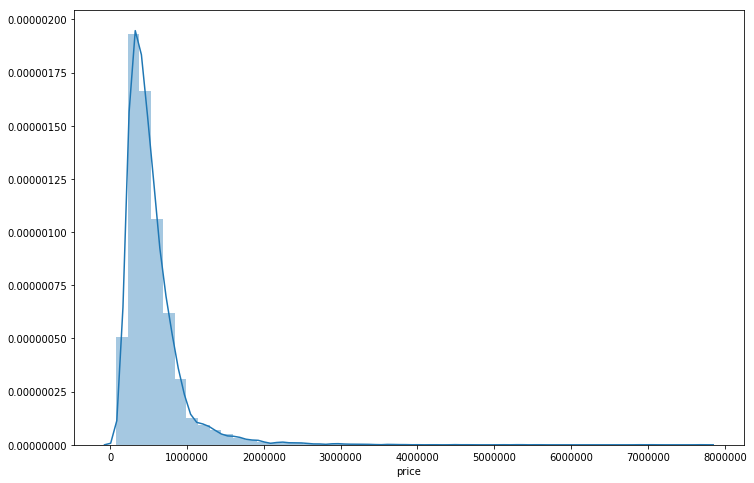

In [19]:
# Then we plot a histogram of the label which is df_home['Price']

plt.figure(figsize=(12,8))
sns.distplot(df_home['price'])

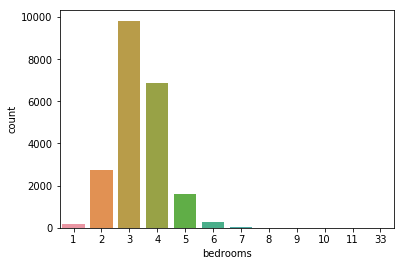

In [18]:
# Now we plot a count plot of the homes based on their bedrooms. 

sns.countplot(df_home['bedrooms'])

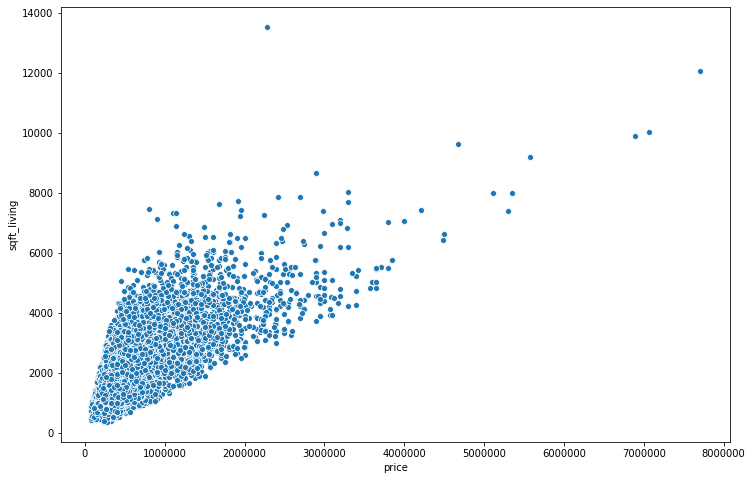

In [7]:
# A scatterplot of the price and square feet of the living bedroom can shows that if they are correlated.


plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df_home)

From the scatter plot we find out that sqft_living and the price are approximately linearly correlated.

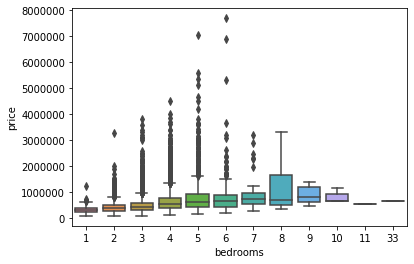

In [8]:
sns.boxplot(x='bedrooms',y='price',data=df_home)

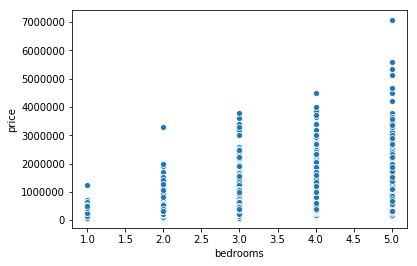

In [24]:
plt.figure(figsize=(6,4))

sns.scatterplot(x='bedrooms', y='price', data=df_home[df_home['bedrooms']<=5])

So far, we have investigated the relation between the price and home features like the number of bedrooms etc.


### Investigation of geographical properties

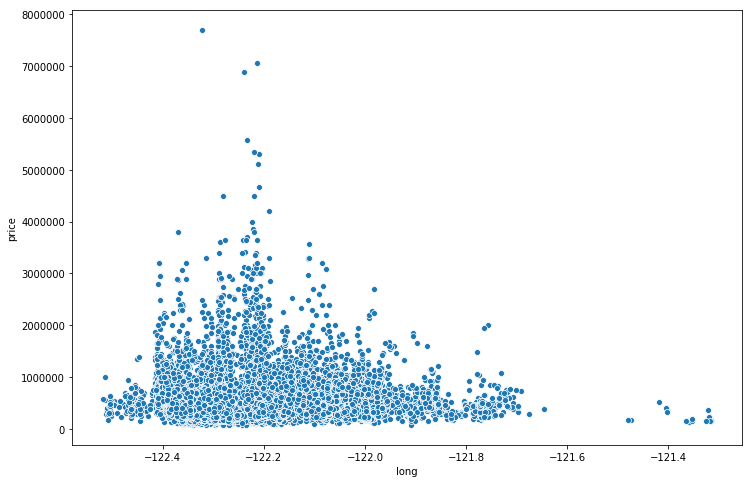

In [30]:
# Investigation of the correlation of the house price and longitude

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='price',data=df_home)

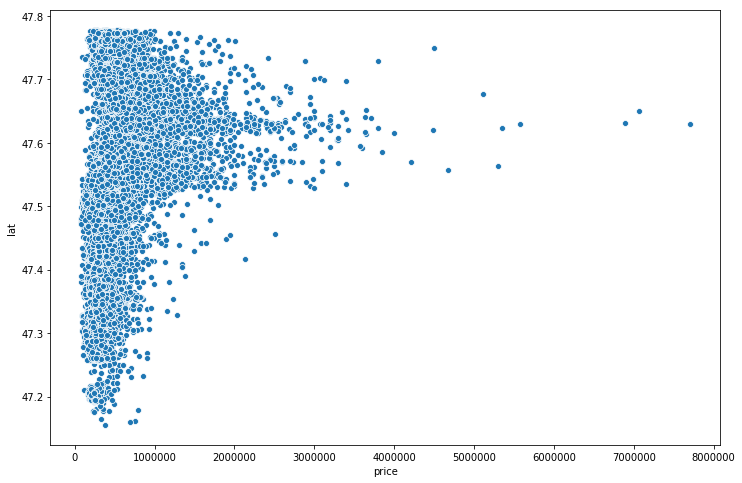

In [26]:
# Investigation of the correlation of the house price and latitude


plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df_home)

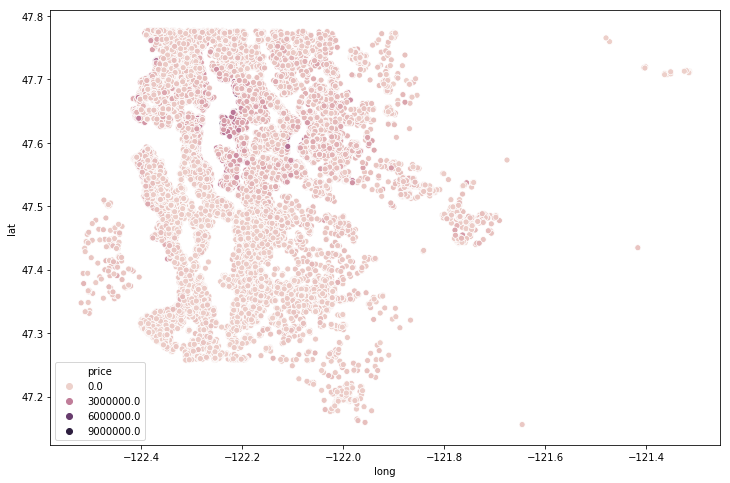

In [27]:
# # Investigation of the correlation of the house price and longitude and lattitude at the same time


plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_home, hue='price')

In [29]:
# Now we sort the prices descending to find the most expensive houses

df_home.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [31]:
# Finding the 1% most expensive houses

len(df_home)*(0.01)  # The total number of the 1% most expensive houses

215.97

In [32]:
# Defining a new dataframe excluding 1% most expensive houses

exclude_1_perc = df_home.sort_values('price',ascending=False).iloc[216:]

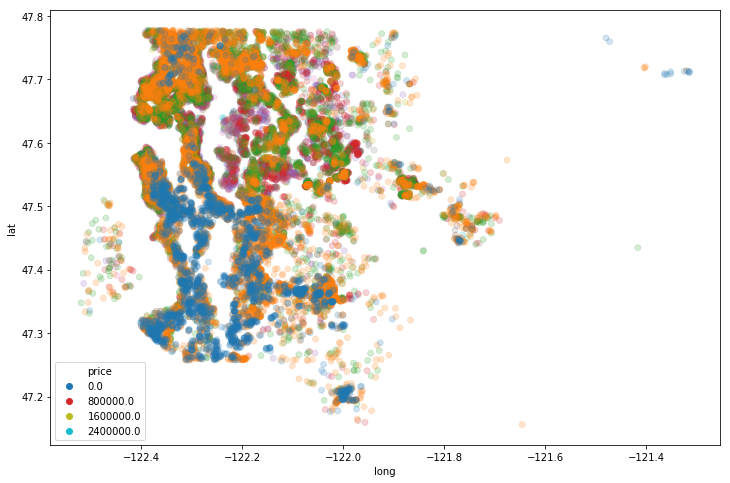

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=exclude_1_perc,hue='price',
                palette='tab10', edgecolor=None,alpha=0.2)

### Now we explore other features

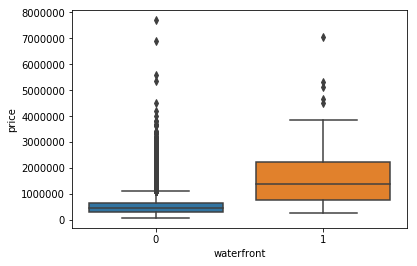

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront',y='price',data=df_home)

### Feature Engineering

In [38]:
df_home.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
df_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [40]:
# we drop the id column since it seems that it's not related to the price of the houses

df_home = df_home.drop('id',axis=1)

In [41]:
df_home.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df_home['date'] = pd.to_datetime(df_home['date'])

In [43]:
df_home['month'] = df_home['date'].apply(lambda date:date.month)

In [44]:
df_home['year'] = df_home['date'].apply(lambda date:date.year)

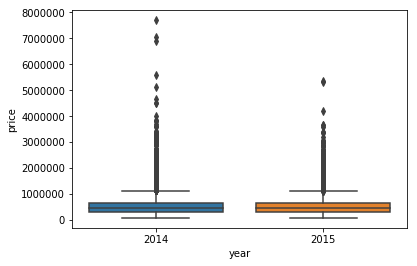

In [45]:
sns.boxplot(x='year',y='price',data=df_home)

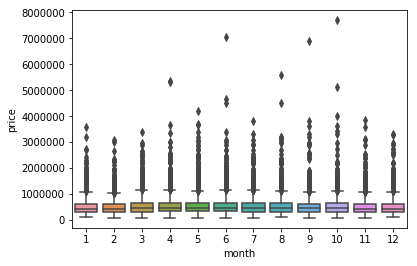

In [46]:
sns.boxplot(x='month',y='price',data=df_home)

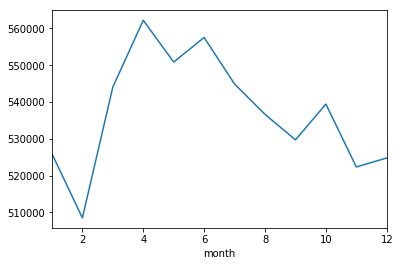

In [50]:
# We groupby the data by month then calculate the average price for each month and plot the result

df_home.groupby('month').mean()['price'].plot()

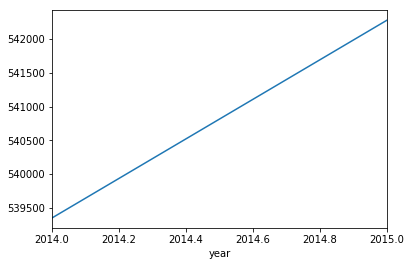

In [52]:
# We groupby the data by year then calculate the average price for each month and plot the result


df_home.groupby('year').mean()['price'].plot()

In [53]:
# Since we have extracted information from the date column now we can remove it

df_home = df_home.drop('date',axis=1)

In [55]:
df_home.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [62]:
# Printing unique zipcodes

df_home['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [63]:
# We also can drop the zipcode for this task.

df_home = df_home.drop('zipcode',axis=1)

In [64]:
df_home.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [65]:
# could make sense due to scaling, higher should correlate to more value
df_home['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [67]:
df_home['sqft_basement'].value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

## Splitting the dataset into training and test sets

In [68]:
X = df_home.drop('price',axis=1)
y = df_home['price']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#Specifiying random state for reproducibility

## Time to Scale data before training

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
X_train= scaler.fit_transform(X_train) # Scaling and transforming at one step

/Users/hadiazari/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [74]:
X_test = scaler.transform(X_test) # we also must transform the test data set

In [75]:
X_train.shape

(15117, 19)

In [76]:
X_test.shape

(6480, 19)

## Creating Neural Network Model

In [77]:
# Import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [79]:
NN_model = Sequential()

NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(19,activation='relu'))
NN_model.add(Dense(1))

NN_model.compile(optimizer='adam',loss='mse')

## Training the Model

In [80]:
NN_model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 430235811840.0000 - val_loss: 418903457792.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429309820928.0000 - val_loss: 415823757312.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 416879607808.0000 - val_loss: 386935259136.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 352884883456.0000 - val_loss: 280502796288.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 210322980864.0000 - val_loss: 132100349952.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 110519140352.0000 - val_loss: 95610232832.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97849901056.0000 - val_loss: 93815005184.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96110206976.0000 - val_loss: 92239020032.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 37695385600.0000 - val_loss: 36369973248.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 37560352768.0000 - val_loss: 36241969152.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37450698752.0000 - val_loss: 36145000448.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37276422144.0000 - val_loss: 36042649600.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 37205618688.0000 - val_loss: 35892928512.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37073764352.0000 - val_loss: 35808120832.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36972765184.0000 - val_loss: 35671150592.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36849651712.0000 - val_loss: 35562868736.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33132025856.0000 - val_loss: 31782641664.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33089372160.0000 - val_loss: 31764307968.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33051033600.0000 - val_loss: 31681292288.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33034250240.0000 - val_loss: 31678226432.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 33034033152.0000 - val_loss: 31592916992.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 33007689728.0000 - val_loss: 31556892672.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32924708864.0000 - val_loss: 31532550144.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32888215552.0000 - val_loss: 31519744000.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31579930624.0000 - val_loss: 29950576640.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31562346496.0000 - val_loss: 29916575744.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31576109056.0000 - val_loss: 29912299520.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31504099328.0000 - val_loss: 30112325632.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31555784704.0000 - val_loss: 29884641280.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31503177728.0000 - val_loss: 29893128192.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31486742528.0000 - val_loss: 29832710144.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31440689152.0000 - val_loss: 29878740992.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30703654912.0000 - val_loss: 28958638080.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30706149376.0000 - val_loss: 28942620672.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30741856256.0000 - val_loss: 28885090304.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30674083840.0000 - val_loss: 28868583424.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30651529216.0000 - val_loss: 28826408960.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30655029248.0000 - val_loss: 28843339776.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30598455296.0000 - val_loss: 28794040320.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30654248960.0000 - val_loss: 28779659264.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30032396288.0000 - val_loss: 28119558144.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30054178816.0000 - val_loss: 28084471808.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30067154944.0000 - val_loss: 28319735808.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30018572288.0000 - val_loss: 28057692160.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30025064448.0000 - val_loss: 28040478720.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29981628416.0000 - val_loss: 28164132864.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30013138944.0000 - val_loss: 28024096768.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29997322240.0000 - val_loss: 28037748736.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29451778048.0000 - val_loss: 27200962560.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29409646592.0000 - val_loss: 27198722048.0000


In [81]:
losses = pd.DataFrame(NN_model.history.history)

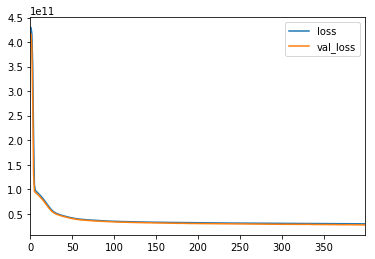

In [82]:
losses.plot()

## Now we can test the model on the test set

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on the test data

In [84]:
model_predictions = NN_model.predict(X_test)

In [85]:
mean_absolute_error(y_test,model_predictions)

102333.82663122106

In [86]:
np.sqrt(mean_squared_error(y_test,model_predictions))

164920.35490449468

In [87]:
explained_variance_score(y_test,model_predictions)

0.7949071944826103

In [88]:
df_home['price'].mean()

540296.5735055795

In [89]:
df_home['price'].median()

450000.0

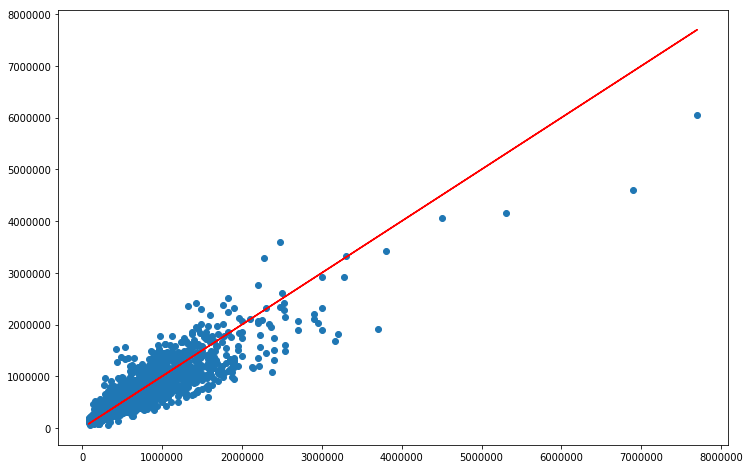

In [94]:
# Scatter plot of the prediction
plt.figure(figsize=(12,8))

plt.scatter(y_test,model_predictions)

# The real values
plt.plot(y_test,y_test,'r')

In [92]:
errors = y_test.values.reshape(6480, 1) - model_predictions

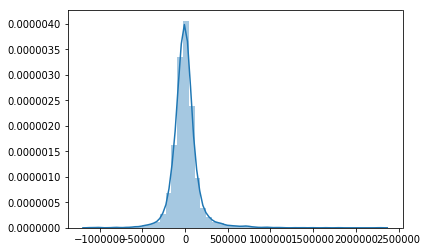

In [93]:
sns.distplot(errors)

### Predicting on new data

In [95]:
# Storing the feature of one of the houses and predicting

single_house_feature = df_home.drop('price',axis=1).iloc[0]

In [96]:
# Scaling and transorming the data for prediction

single_house_feature = scaler.transform(single_house_feature.values.reshape(-1, 19))

In [97]:
single_house_feature

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [101]:
new_prediction = NN_model.predict(single_house_feature)

In [102]:
df_home['price'].iloc[0]

221900.0

In [104]:
# Error rate

error_rate = abs(new_prediction-df_home['price'].iloc[0])/df_home['price'].iloc[0]*100.0 
error_rate

array([[29.24117]], dtype=float32)

The mdoel still can be refined!